In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pygtc
    
import sys 
sys.path.insert(0, '../analysis/src/')
import jsm_SHMR
import jsm_stats

import warnings; warnings.simplefilter('ignore')
from IPython.display import display, Math


In [26]:
def stack(samples, stack):    
    nsteps = samples.shape[0]
    ssteps = nsteps - stack
    s = samples[ssteps:nsteps,:,:].shape
    return samples[ssteps:nsteps,:,:].reshape(s[0] * s[1], s[2]) 

def best_fit_values(sample, labels):
    list_val = []
    for i in range(4):
        mcmc = np.percentile(sample[:, i], [16, 50, 84])
        q = np.diff(mcmc)
        txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
        txt = txt.format(mcmc[1], q[0], q[1], labels[i])
        #display(Math(txt))
        list_val.append([mcmc[1], q[0], q[1]])
    return np.array(list_val)

def error_bar(samples, xaxis, xlabel, labels):

    Nsamples = samples.shape[0]
    val_mat = np.zeros(shape=(Nsamples, 4, 3))

    for i in range(Nsamples):
        val_mat[i] = best_fit_values(samples[i], labels)

    fig, ax = plt.subplots(2, 2, sharex=True, figsize=(10,8))

    ax[0,0].errorbar(xaxis, val_mat[:, 0, 0], yerr=[val_mat[:, 0, 1], val_mat[:, 0, 2]], fmt="o", color="black")
    ax[0,0].axhline(1.8, ls=":")
    ax[0,0].set_ylabel(labels[0])
    ax[0,0].set_ylim(-1,5)

    ax[1,0].errorbar(xaxis, val_mat[:, 1, 0], yerr=[val_mat[:, 1, 1], val_mat[:, 1, 2]], fmt="o", color="black")
    ax[1,0].axhline(-0.2, ls=":")
    ax[1,0].set_xlabel(xlabel)
    ax[1,0].set_ylabel(labels[1])
    ax[1,0].set_ylim(-2,1)

    ax[0,1].errorbar(xaxis, val_mat[:, 2, 0], yerr=[val_mat[:, 2, 1], val_mat[:, 2, 2]], fmt="o", color="black")
    ax[0,1].axhline(0.4, ls=":")
    ax[0,1].set_ylabel(labels[2])
    ax[0,1].set_ylim(0,4)


    ax[1,1].errorbar(xaxis, val_mat[:, 3, 0], yerr=[val_mat[:, 3, 1], val_mat[:, 3, 2]], fmt="o", color="black")
    ax[1,1].axhline(10.1, ls=":")
    ax[1,1].set_xlabel(xlabel)
    ax[1,1].set_ylabel(labels[3])
    ax[1,1].set_ylim(9,11)
    plt.show() 

def violin_old(samples, labels, priors, truths):

    fig, ax = plt.subplots(2, 2, sharex=True,figsize=(10,10))

    ax[0,0].violinplot([samples[0][:,0], samples[1][:,0], samples[2][:,0], samples[3][:,0], samples[4][:,0]])
    ax[0,0].axhline(truths[0], ls=":", lw=2, color="black")
    ax[0,0].set_ylabel(labels[0])
    ax[0,0].set_ylim(priors[0][0], priors[0][1])

    ax[1,0].violinplot([samples[0][:,1], samples[1][:,1], samples[2][:,1], samples[3][:,1], samples[4][:,1]])
    ax[1,0].axhline(truths[1], ls=":", lw=2, color="black")
    ax[1,0].set_ylabel(labels[1])
    ax[1,0].set_ylim(priors[1][0], priors[1][1])

    ax[0,1].violinplot([samples[0][:,2], samples[1][:,2], samples[2][:,2], samples[3][:,2], samples[4][:,2]])
    ax[0,1].axhline(truths[2], ls=":", lw=2, color="black")
    ax[0,1].set_ylabel(labels[2])
    ax[0,1].set_ylim(priors[2][0], priors[2][1])

    ax[1,1].violinplot([samples[0][:,3], samples[1][:,3], samples[2][:,3], samples[3][:,3], samples[4][:,3]])
    ax[1,1].axhline(truths[3], ls=":", lw=2, color="black")
    ax[1,1].set_ylabel(labels[3])
    ax[1,1].set_ylim(priors[3][0], priors[3][1])
    plt.show() 


def violin(samples, plabels, priors, truths, labels, xlabel):

    fig, ax = plt.subplots(2, 2, sharex=True,figsize=(10,10))

    a1_data = [samples[0][:,0], samples[1][:,0], samples[2][:,0]]
    a2_data = [samples[0][:,1], samples[1][:,1], samples[2][:,1]]
    a3_data = [samples[0][:,2], samples[1][:,2], samples[2][:,2]]
    a4_data = [samples[0][:,3], samples[1][:,3], samples[2][:,3]]

    ax[0,0].violinplot(a1_data, vert=True, showextrema=True, widths=0.5, showmedians=False)
    ax[0,0].axhline(truths[0], ls="--", lw=1, color="black")
    ax[0,0].set_ylabel(plabels[0])
    ax[0,0].set_ylim(priors[0][0], priors[0][1])

    ax[0,1].violinplot(a2_data, vert=True, showextrema=True, widths=0.5, showmedians=False)
    ax[0,1].axhline(truths[1], ls="--", lw=1, color="black")
    ax[0,1].set_ylabel(plabels[1])
    ax[0,1].set_ylim(priors[1][0], priors[1][1])

    ax[1,0].violinplot(a3_data, vert=True, showextrema=True, widths=0.5, showmedians=False)
    ax[1,0].axhline(truths[2], ls="--", lw=1, color="black")
    ax[1,0].set_ylabel(plabels[2])
    ax[1,0].set_ylim(priors[2][0], priors[2][1])
    ax[1,0].set_xlabel(xlabel)

    ax[1,1].violinplot(a4_data, vert=True, showextrema=True, widths=0.5, showmedians=False)
    ax[1,1].axhline(truths[3], ls="--", lw=1, color="black")
    ax[1,1].set_ylabel(plabels[3])
    ax[1,1].set_xticks([1,2,3], labels=labels)
    ax[1,1].set_xlabel(xlabel)
    plt.show() 

In [27]:
def SHMR_colored(sample, SHMR_model, labels, color_ind, plot_data=True):
    halo_masses = np.log10(np.logspace(6, 13, 100))  # just for the model

    SHMR_mat = np.zeros(shape=(sample.shape[0], halo_masses.shape[0]))

    # Extract the color values for each data point
    colors = sample[:, color_ind]

    norm = mpl.colors.Normalize(vmin=colors.min(), vmax=colors.max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.magma_r)

    if SHMR_model == "simple":
        for i,val in enumerate(sample):  # now pushing all thetas through!
            SHMR_mat[i] = jsm_SHMR.simple([val[0], 0], halo_masses)

    elif SHMR_model =="anchor":
        for i,val in enumerate(sample):  # now pushing all thetas through!
            SHMR_mat[i] = jsm_SHMR.anchor([val[0], 0, val[2]], halo_masses)

    elif SHMR_model =="curve":
        for i,val in enumerate(sample):  # now pushing all thetas through!
            SHMR_mat[i] = jsm_SHMR.curve([val[0], 0, val[2], val[3]], halo_masses)

    elif SHMR_model =="sigma":
        for i,val in enumerate(sample):  # now pushing all thetas through!
            SHMR_mat[i] = jsm_SHMR.sigma([val[0], 0, val[2], val[3], 0], halo_masses)

    elif SHMR_model =="redshift":
        for i,val in enumerate(sample):  # now pushing all thetas through!
            SHMR_mat[i] = jsm_SHMR.redshift([val[0], 0, val[2], val[3], 0, val[5]], halo_masses, np.zeros(shape=halo_masses.shape[0]))

    plt.figure(figsize=(10, 8))
    for i, val in enumerate(SHMR_mat):
        plt.plot(halo_masses, val, color=cmap.to_rgba(colors[i]), alpha=0.3, lw=1)


    if plot_data==True:
        hmm = np.load("../analysis/model_test/mock_data.npy")
        plt.scatter(hmm[0], hmm[1], marker=".", color="grey")
        plt.axhline(6.5, label="mass limit", lw=3, ls=":", color="black")

        
    plt.ylim(4, 11)
    plt.xlim(7.5, 12)
    plt.ylabel("M$_{*}$ (M$_\odot$)", fontsize=15)
    plt.xlabel("M$_{\mathrm{vir}}$ (M$_\odot$)", fontsize=15)

    # Create a colorbar using the ScalarMappable
    cbar = plt.colorbar(cmap, label=labels[color_ind])
    cbar.set_label(labels[color_ind])

    plt.show()

    return SHMR_mat

In [7]:
fid_theta_total = [2, 0.2, 10.5, 0, 0, 0]
priors_total = [[-1,7], [0,5], [10,11], [-3,2], [-2,2], [-1,1]]
params_total = ["slope", "sigma_0", "anchor", "curvature", "sigma", "redshift"]

### N_hosts experiment

In [8]:
simple =  np.load("../analysis/remote/v2/simple/samples.npz")["coords"]

anchor =  np.load("../analysis/remote/v2/anchor/samples.npz")["coords"]

curve =  np.load("../analysis/remote/v2/curve/samples.npz")["coords"]

sigma = np.load("../analysis/remote/v2/sigma/samples.npz")["coords"]

redshift = np.load("../analysis/remote/v2/redshift/samples.npz")["coords"]

In [9]:
stack_simple = stack(simple, 350)
stack_anchor = stack(anchor, 350)
stack_curve = stack(curve, 350)
stack_sigma = stack(sigma, 350)
stack_red = stack(redshift, 350)

NameError: name 'stack' is not defined

In [135]:
# # Labels for the different chains

# GTC = pygtc.plotGTC(chains=[stack_simple], 
#                     paramNames=params_total[0:2],
#                     truths=fid_theta_total[0:2],
#                     nContourLevels=3,
#                     figureSize=8,
#                     smoothingKernel=1,
#                     paramRanges = priors_total[0:2],
#                     customTickFont={'family':'Arial', 'size':12},
#                     customLegendFont={'family':'Arial', 'size':15},
#                     customLabelFont={'family':'Arial', 'size':12})
# #WTFF!!!! what is this?
# GTC = pygtc.plotGTC(chains=[stack_anchor], 
#                     paramNames=params_total[0:3],
#                     truths=fid_theta_total[0:3],
#                     nContourLevels=3,
#                     figureSize=9,
#                     smoothingKernel=1,
#                     paramRanges = priors_total[0:3],                    
#                     customTickFont={'family':'Arial', 'size':12},
#                     customLegendFont={'family':'Arial', 'size':15},
#                     customLabelFont={'family':'Arial', 'size':12})
# # Labels for the different chains

# GTC = pygtc.plotGTC(chains=[stack_curve], 
#                     paramNames=params_total[0:4],
#                     truths=fid_theta_total[0:4],
#                     nContourLevels=3,
#                     figureSize=10,
#                     smoothingKernel=1,
#                     paramRanges = priors_total[0:4],
#                     customTickFont={'family':'Arial', 'size':12},
#                     customLegendFont={'family':'Arial', 'size':15},
#                     customLabelFont={'family':'Arial', 'size':12})
# # Labels for the different chains

# GTC = pygtc.plotGTC(chains=[stack_sigma], 
#                     paramNames=params_total[0:5],
#                     truths=fid_theta_total[0:5],
#                     nContourLevels=3,
#                     figureSize=10,
#                     smoothingKernel=1,
#                     paramRanges = priors_total[0:5],
#                     customTickFont={'family':'Arial', 'size':12},
#                     customLegendFont={'family':'Arial', 'size':15},
#                     customLabelFont={'family':'Arial', 'size':12})

# GTC = pygtc.plotGTC(chains=[stack_red], 
#                     paramNames=params_total[0:6],
#                     truths=fid_theta_total[0:6],
#                     nContourLevels=3,
#                     figureSize=10,
#                     smoothingKernel=1,
#                     paramRanges = priors_total[0:6],
#                     customTickFont={'family':'Arial', 'size':12},
#                     customLegendFont={'family':'Arial', 'size':15},
#                     customLabelFont={'family':'Arial', 'size':12})

In [10]:
last_simple = simple[999,:,:]
last_anchor = anchor[999,:,:]
last_curve = curve[999,:,:]
last_sigma = sigma[999,:,:]
last_red = redshift[999,:,:]

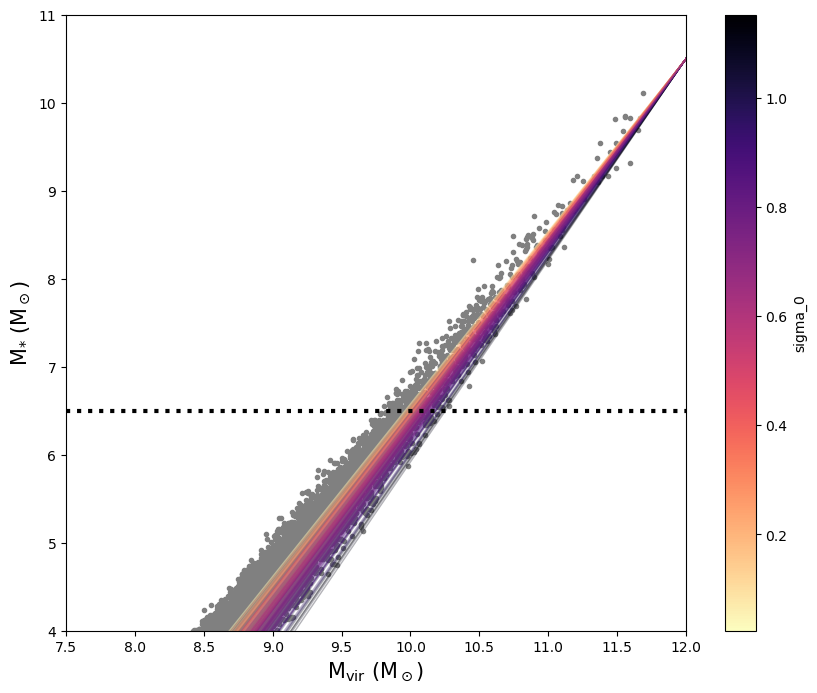

array([[-2.09983913, -1.95135618, -1.80287323, ..., 12.30300728,
        12.45149024, 12.59997319],
       [-2.22384308, -2.0738988 , -1.92395452, ..., 12.32075196,
        12.47069623, 12.62064051],
       [-1.43928863, -1.29858994, -1.15789125, ..., 12.20848406,
        12.34918275, 12.48988144],
       ...,
       [-1.65796375, -1.51468809, -1.37141242, ..., 12.23977596,
        12.38305162, 12.52632729],
       [-2.23674959, -2.08665321, -1.93655684, ..., 12.32259885,
        12.47269522, 12.6227916 ],
       [-2.31239077, -2.161403  , -2.01041523, ..., 12.33342292,
        12.48441069, 12.63539846]])

In [137]:
SHMR_colored(last_simple, "simple", params_total[0:2], 1)

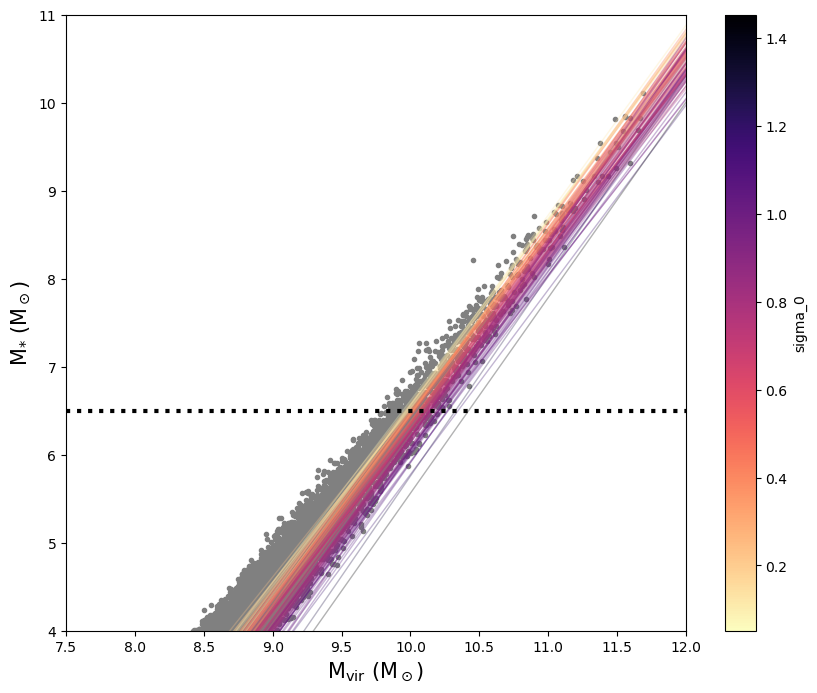

array([[-2.48571256, -2.33332022, -2.18092787, ..., 12.29634504,
        12.44873738, 12.60112973],
       [-2.02712961, -1.87923337, -1.73133714, ..., 12.31880548,
        12.46670172, 12.61459796],
       [-1.7735115 , -1.62811448, -1.48271747, ..., 12.32999888,
        12.4753959 , 12.62079291],
       ...,
       [-1.47659494, -1.33489715, -1.19319936, ..., 12.2680909 ,
        12.40978869, 12.55148648],
       [-1.57719248, -1.43490206, -1.29261165, ..., 12.22497788,
        12.36726829, 12.50955871],
       [-1.56497836, -1.42250217, -1.28002597, ..., 12.25521244,
        12.39768863, 12.54016483]])

In [138]:
SHMR_colored(last_anchor, "anchor", params_total[0:3], 1)

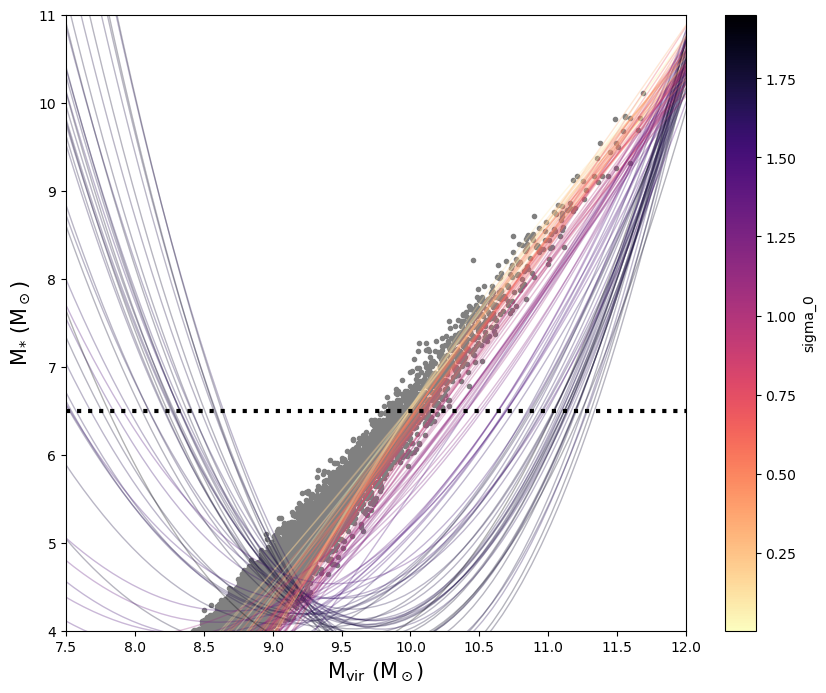

array([[-1.36404294, -1.2422005 , -1.11990316, ..., 12.57265534,
        12.73862239, 12.90504434],
       [17.55519058, 17.03335084, 16.5219458 , ..., 15.52071036,
        16.01103676, 16.51179786],
       [ 8.41252071,  8.19615181,  7.98552017, ..., 14.13736647,
        14.47751067, 14.82339212],
       ...,
       [-5.44969438, -5.19540101, -4.94270676, ..., 11.77125036,
        11.87042889, 11.96800831],
       [-4.10499226, -3.88556509, -3.66733219, ..., 11.61892406,
        11.72250707, 11.82489582],
       [23.99093823, 23.24767759, 22.51835647, ..., 16.7970423 ,
        17.40591471, 18.02872663]])

In [139]:
SHMR_colored(last_curve, "curve", params_total[0:4], 1)

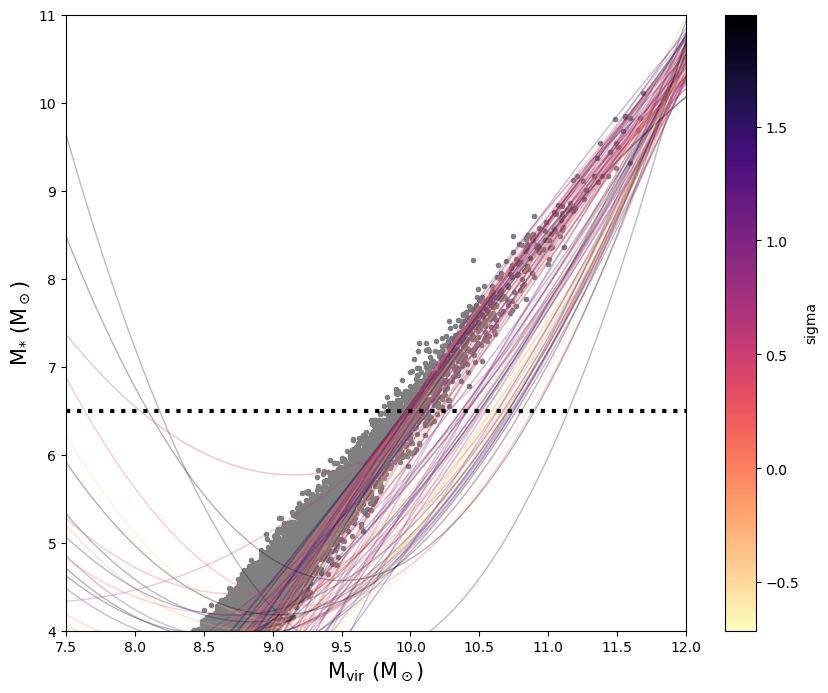

array([[ 6.74699587,  6.57411237,  6.40638989, ..., 14.00706072,
        14.33479732, 14.66769494],
       [-6.22848041, -5.94065318, -5.65504707, ..., 11.34921396,
        11.42159229, 11.4917495 ],
       [-7.48154638, -7.19985449, -6.91976744, ..., 12.37044639,
        12.4964691 , 12.62088698],
       ...,
       [ 2.40690296,  2.35639472,  2.30937128, ..., 13.7328294 ,
        14.02034669, 14.31134878],
       [-6.6644222 , -6.38637021, -6.11009108, ..., 12.05215744,
        12.15824144, 12.26255257],
       [-8.04161729, -7.72116081, -7.40323201, ..., 11.27381777,
        11.34909002, 11.42183459]])

In [197]:
SHMR_colored(last_sigma, "sigma", params_total[0:5], 4)

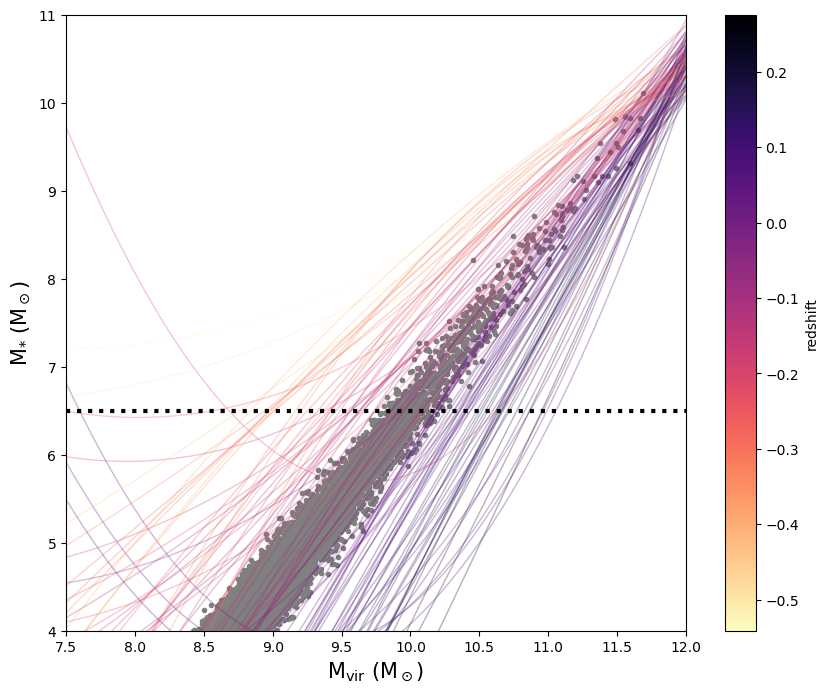

array([[-1.27556419, -1.16208251, -1.0479807 , ..., 12.61946753,
        12.79310148, 12.96735555],
       [-6.01618703, -5.72352147, -5.43322589, ..., 11.33773614,
        11.40051344, 11.46092076],
       [-6.1723653 , -5.92774246, -5.68430878, ..., 12.01924021,
        12.14851284, 12.27659628],
       ...,
       [-4.46412523, -4.14387919, -3.82717326, ..., 10.11696287,
        10.0938177 , 10.06713242],
       [ 2.36926148,  2.40314754,  2.43854193, ..., 12.67902313,
        12.85921781, 13.04092083],
       [-2.80359968, -2.56739184, -2.33303572, ..., 11.48695798,
        11.5435491 , 11.5982885 ]])

In [141]:
SHMR_colored(last_red, "redshift", params_total[0:6], 5)

In [193]:
alpha = [stack_simple[:,0], stack_anchor[:,0], stack_curve[:,0], stack_sigma[:,0], stack_red[:,0]]
sigma_0 = [stack_simple[:,1], stack_anchor[:,1], stack_curve[:,1], stack_sigma[:,1], stack_red[:,1]]
M_star = [-99, stack_anchor[:,2], stack_curve[:,2], stack_sigma[:,2], stack_red[:,2]]
delta = [-99, -99, stack_curve[:,3], stack_sigma[:,3], stack_red[:,3]]
sigma = [-99, -99, -99, stack_sigma[:,4], stack_red[:,4]]
gamma = [-99, -99, -99, -99, stack_red[:,5]]

In [194]:
fid_theta_total = [2, 0.2, 10.5, 0, 0, 0]
priors_total = [[-1,7], [0,5], [9.8,11.2], [-3,2], [-2,2], [-1,1]]
params_total = ["slope", "sigma_0", "anchor", "curvature", "sigma", "redshift"]

In [195]:
def general_violin(data_list, truths, priors, plabels, mlabels):
    num_plots = len(data_list)
    fig, axes = plt.subplots(num_plots, sharex=True, figsize=(10, 3 * num_plots))

    for plot_idx, (data, truth, prior, label) in enumerate(zip(data_list, truths, priors, plabels)):
        axes[plot_idx].violinplot(data, showextrema=False, showmedians=True)
        axes[plot_idx].axhline(truth, ls="--", lw=1, color="black")
        axes[plot_idx].set_ylabel(label)
        axes[plot_idx].set_ylim(prior[0], prior[1])

        if plot_idx == num_plots - 1:
            axes[plot_idx].set_xticks(range(1,6), labels=mlabels)

    plt.show()

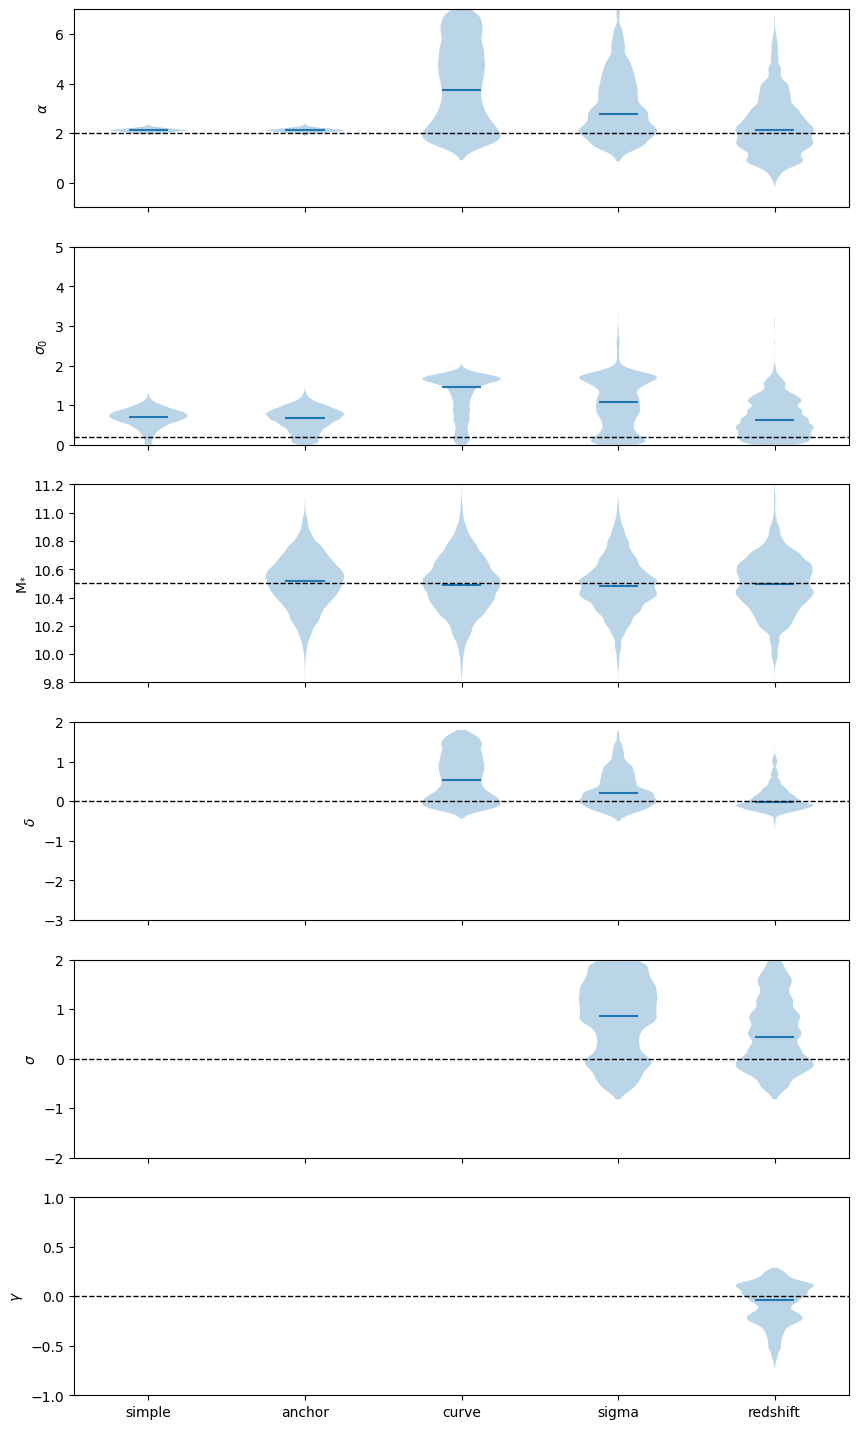

In [196]:
data_list_total = [alpha, sigma_0, M_star, delta, sigma, gamma]
plabels = ["$\\alpha$", "$\\sigma_0$", "M$_{*}$", "$\\delta$", "$\\sigma$", "$\\gamma$"]
mlabels = ["simple", "anchor", "curve", "sigma", "redshift"]

general_violin(data_list_total, fid_theta_total, priors_total, plabels, mlabels)


### testing the CSMF with the curve function

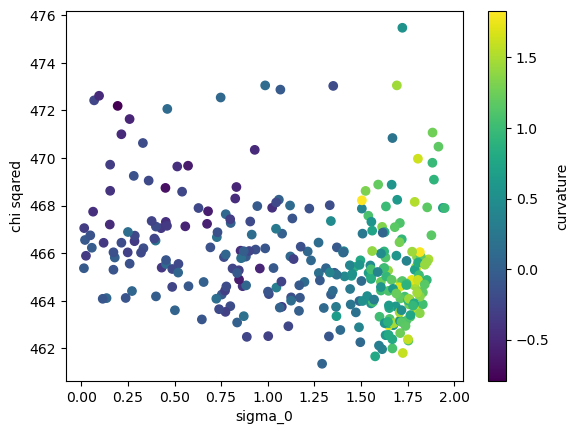

In [114]:
curve_chisq =  np.load("../analysis/model_test_remote_v1/curve/samples.npz")["chisq"]
ind = 1
plt.scatter(last_curve[:,ind], curve_chisq[999], c=last_curve[:,3])
plt.ylabel("chi sqared")
plt.xlabel(params_total[ind])

cbar = plt.colorbar()
cbar.set_label('curvature')

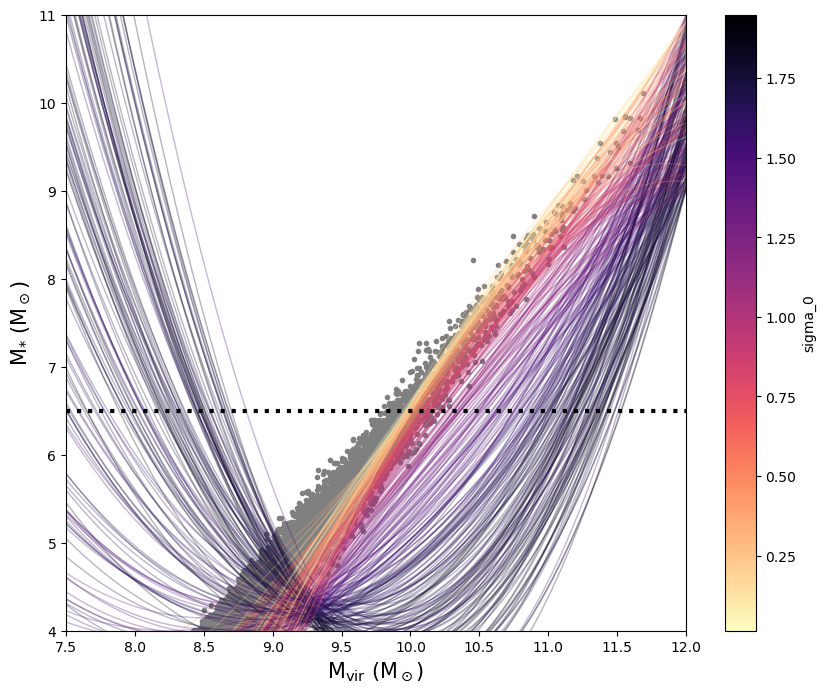

In [41]:
mat = SHMR_colored(last_curve, "curve", params_total[0:4], 1)

In [42]:
np.where(last_curve[:,3] == np.max(last_curve[:,3]))

(array([186]),)

In [43]:
last_curve[186]

array([6.78605878, 1.50533965, 9.51868134, 1.82947795])

In [44]:
# halo_mat = np.zeros(shape=(10000,1000))
# for i in range(10000):
#     halo_mat[i] = np.linspace(6,12,1000)

#halo_mat1 = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["mass"][0] #this was the data

In [45]:
# bin_lgMs = np.linspace(2,11,41)
# bin_lgMh = np.linspace(8,11.9,41)
# bincenters_lgMs = 0.5 * (bin_lgMs[1:] + bin_lgMs[:-1])
# bincenters_lgMg = 0.5 * (bin_lgMh[1:] + bin_lgMh[:-1])

# hist_acc, xedges, yedges = np.histogram2d(halo_mat.flatten(), lgMs_1.flatten(), (bin_lgMh, bin_lgMs))

# wow = np.rot90(hist_acc)

# fig,ax=plt.subplots(figsize=(9,5))
# im = ax.imshow(wow, extent=[bin_lgMh.min(), bin_lgMh.max(), bin_lgMs.min(), bin_lgMs.max()])

In [5]:
data = np.load("../analysis/model_test/mock_data.npy")

halo_mat = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["mass"][92] #this was the data

In [12]:
lgMs_fid = jsm_SHMR.simple([2,0.2], halo_mat)
lgMs_1 = jsm_SHMR.curve([6.78605878, 1.50533965, 9.51868134, 1.82947795], halo_mat) #207

In [13]:
stat_fid = jsm_stats.SatStats(lgMs_fid)
stat_fid.CSMF()

In [14]:
stat_1 = jsm_stats.SatStats(lgMs_1)
stat_1.CSMF()

In [57]:
labelfid = "$\\alpha, \sigma_0, M_{*}, \delta$ = [2.0, 0.2, 10.5, 0]"

label1 = "$\\alpha, \sigma_0, M_{*}, \delta$ = [6.7, 1.5, 10.5, 1.8]"

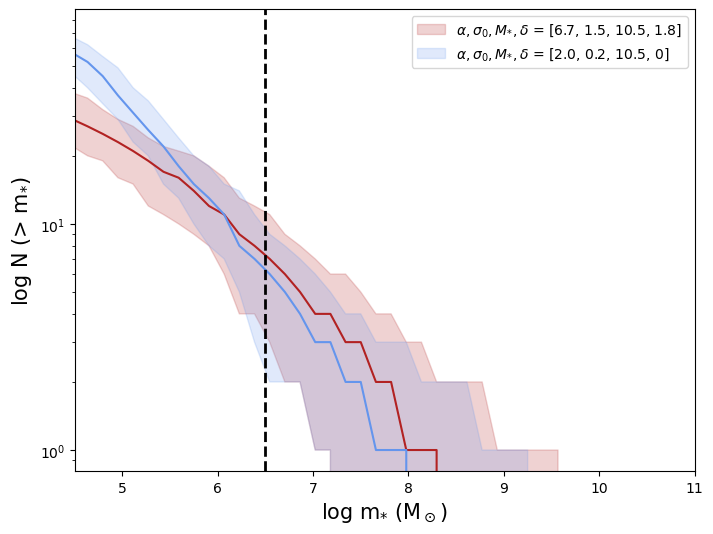

In [58]:
plt.figure(figsize=(8, 6))

plt.plot(stat_1.mass_bins, stat_1.quant[1], color="firebrick")
plt.fill_between(stat_1.mass_bins, y1=stat_1.quant[0], y2=stat_1.quant[2], alpha=0.2, label=label1, color="firebrick")

plt.plot(stat_fid.mass_bins, stat_fid.quant[1], color="cornflowerblue")
plt.fill_between(stat_fid.mass_bins, y1=stat_fid.quant[0], y2=stat_fid.quant[2], alpha=0.2, label=labelfid, color="cornflowerblue")
plt.axvline(6.5, ls="--", color="black", lw=2)

plt.yscale("log")

plt.xlim(4.5, 11)
plt.xlabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{*}$)", fontsize=15)
plt.legend()
plt.show()

In [53]:
smooth_halo = np.linspace(7,12,100)

In [54]:
blue_mask = lgMs_fid.flatten() > 6.5
red_mask = lgMs_1.flatten() > 6.5

blue_halos = halo_mat.flatten()[blue_mask]
red_halos = halo_mat.flatten()[red_mask]

In [55]:
blue_stars = lgMs_fid.flatten()[blue_mask]
red_stars = lgMs_1.flatten()[red_mask]

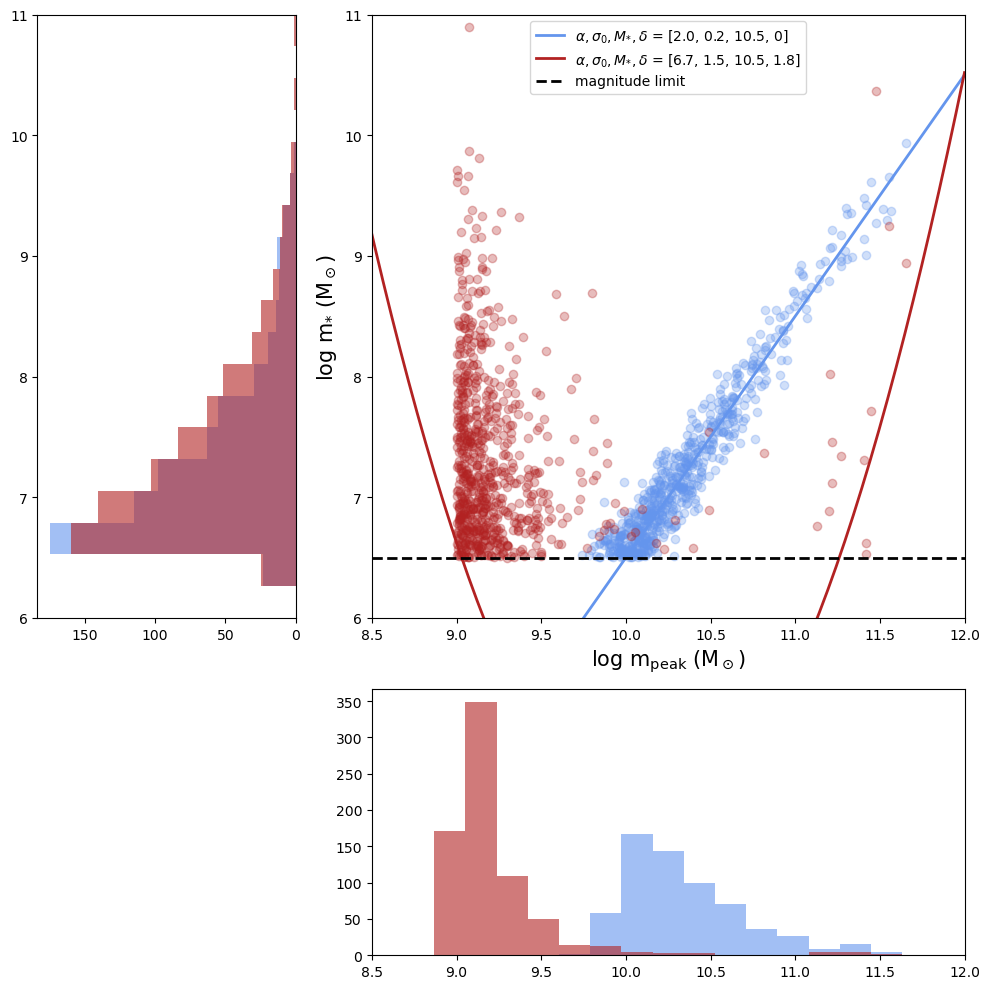

In [59]:
# Create scatter plot
plt.figure(figsize=(10, 10))

star_bins = np.linspace(6,11,20)
halo_bins = np.linspace(8.5,12,20)
# Distribution plot on the right
ax_right = plt.subplot2grid((3, 3), (0, 0), rowspan=2)
ax_right.hist(blue_stars, bins=star_bins, orientation='horizontal', color="cornflowerblue", alpha=0.6)
ax_right.hist(red_stars, bins=star_bins, orientation='horizontal', color="firebrick", alpha=0.6)
ax_right.invert_xaxis()
ax_right.yaxis.tick_left()
ax_right.set_ylim(6,11)


# Scatter plot
ax_main = plt.subplot2grid((3, 3), (0, 1), rowspan=2, colspan=2)
ax_main.scatter(blue_halos, blue_stars, color="cornflowerblue", alpha=0.3)
ax_main.scatter(red_halos, red_stars, color="firebrick", alpha=0.3)

ax_main.plot(smooth_halo, jsm_SHMR.simple([2,0], smooth_halo), color="cornflowerblue", label=labelfid, lw=2)
ax_main.plot(smooth_halo, jsm_SHMR.curve([6.78605878, 0, 10.51868134, 1.82947795],smooth_halo), color="firebrick", label=label1, lw=2)
ax_main.axhline(6.5, ls="--", lw=2, c="black", label="magnitude limit")
ax_main.set_ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
ax_main.set_xlabel("log m$_{\mathrm{peak}}$ (M$_\odot$)", fontsize=15)
ax_main.legend()
ax_main.set_ylim(6,11)
ax_main.set_xlim(8.5,12)


# Distribution plot at the bottom
ax_bottom = plt.subplot2grid((3, 3), (2, 1), colspan=2)
ax_bottom.hist(blue_halos, bins=halo_bins, orientation='vertical', color="cornflowerblue", alpha=0.6)
ax_bottom.hist(red_halos, bins=halo_bins, orientation='vertical', color="firebrick", alpha=0.6)
ax_bottom.set_xlim(8.5,12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
